## Introduction

### Heartattack Predictions 

Student ID: IG74096

The dataset consists of 1025 rows and contains 14 columns. The goal is to predict the target variable.

### Importing Packages

In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
heart = pd.read_csv("heart.csv") 

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  disease   1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart.shape

(1025, 14)

In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Pre-processing

In [8]:
# Check missing values
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
disease     0
dtype: int64

In [9]:
heart.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
pd.crosstab(heart.sex, heart.disease)

disease,0,1
sex,,
0,86,226
1,413,300


## Exploratory Data Analysis

In [12]:
heart.disease.value_counts()

1    526
0    499
Name: disease, dtype: int64

In [54]:
# Count the number of cases (presence of heart disease) and non-cases
case_counts = heart['disease'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(x=case_counts.index, y=case_counts.values, color=case_counts.index, text=case_counts.values,
             title="Distribution of Heart Disease Cases", labels={"x": "Heart Disease Presence (0: No Disease, 1: Disease)", "y": "Count"})
fig.update_traces(marker_color=["#66B2FF", "#FF9999"])
fig.update_xaxes(categoryorder="total ascending")
fig.update_yaxes(title_text="Count")

fig.show()

From above plot, there are 526 patients with heart disease cases and 499 patients with no heart disease

In [55]:
# Create a scatter plot using Plotly Express
fig = px.scatter(heart, x="age", y="thalach", color="disease", title="Age vs. Heart Rate", labels={"age": "Age", "thalach": "Heart Rate", "disease": "Heart Disease Presence"})

# Customize legend labels
fig.for_each_trace(lambda trace: trace.update(name="No" if trace.name == 0 else "Yes"))

# Set axis labels
fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="Heart Rate")

fig.show()

The scatter plot suggests that age and maximum heart rate may have an association with heart disease.
It appears that as individuals age, those with heart disease tend to have lower maximum heart rates compared to those without heart disease.

In [58]:
# Create a pair plot using Plotly Express
fig = px.scatter_matrix(heart, dimensions=["age","sex", "trestbps", "chol", "thalach"], color="disease", title="Pair Plot of Selected Features", labels={"disease": "Heart Disease Presence"})

fig.show()

In [61]:
# Calculate gender counts
gender_counts = heart['sex'].value_counts()
labels = ['Male', 'Feale']

# Create a pie chart using Plotly Express
fig = px.pie(values=gender_counts, names=labels, title='Gender Distribution')
fig.update_traces(textinfo='percent+label', marker=dict(colors=['#66B2FF', '#FF9999']))
fig.show()

Pie chart showing the percentage of male patients vs female

In [46]:

# Count the number of males and females in heart disease cases and non-cases
gender_counts = heart.groupby(['disease', 'sex'])['sex'].count().unstack()

# Create a grouped bar chart using Plotly Express
fig = px.bar(gender_counts, x=gender_counts.index, y=['Male', 'Female'], title='Gender Distribution Among Heart Disease Cases and Non-Cases')
fig.update_layout(barmode='group', xaxis_title='Heart Disease Presence', yaxis_title='Count', xaxis_tickvals=[0, 1], xaxis_ticktext=['No Disease', 'Disease'])
fig.show()



There is a clear difference in the gender distribution between heart disease cases and non-cases.
Males are more likely to have heart disease than females. This suggests that gender may be a significant risk factor for heart disease.

In [59]:

# Group data by gender and calculate the count of heart disease cases and non-cases
gender_heart_disease = heart.groupby(['sex', 'disease'])['disease'].count().unstack()

# Create a bar plot using Plotly
fig = go.Figure(data=[
    go.Bar(x=[0, 1], y=gender_heart_disease[0], name='No Disease', marker_color='#FF9999'),
    go.Bar(x=[0, 1], y=gender_heart_disease[1], name='Disease', marker_color='#66B2FF')
])

# Customize the layout
fig.update_layout(
    title='Heart Disease Presence by Gender',
    xaxis=dict(title='Gender (0: Female, 1: Male)', tickvals=[0, 1], ticktext=['Female', 'Male']),
    yaxis=dict(title='Count'),
    barmode='group',
)

# Perform a chi-squared test for gender and heart disease presence
chi2, p, _, _ = chi2_contingency(gender_heart_disease)
print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p}")

fig.show()


Chi-squared test statistic: 78.86305133922973
P-value: 6.656820681726434e-19


The chi-squared test results suggest that there is a strong and highly statistically significant association between gender and the presence of heart disease. This implies that gender is a significant factor in predicting heart disease, and there is evidence to support the claim that gender is associated with heart disease presence in the dataset.

In [62]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create a subplot grid with three subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=("Age Distribution", "Cholesterol Distribution", "Blood Pressure Distribution"))

# Plot the distribution of age
age_hist = go.Histogram(x=heart['age'], marker_color='blue', nbinsx=20)
fig.add_trace(age_hist, row=1, col=1)
fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

# Plot the distribution of cholesterol levels
chol_hist = go.Histogram(x=heart['chol'], marker_color='green', nbinsx=20)
fig.add_trace(chol_hist, row=1, col=2)
fig.update_xaxes(title_text='Cholesterol Level', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

# Plot the distribution of blood pressure (trestbps)
trestbps_hist = go.Histogram(x=heart['trestbps'], marker_color='red', nbinsx=20)
fig.add_trace(trestbps_hist, row=1, col=3)
fig.update_xaxes(title_text='Resting Blood Pressure (mm Hg)', row=1, col=3)
fig.update_yaxes(title_text='Count', row=1, col=3)

# Update layout
fig.update_layout(height=400, width=900)

fig.show()


Above creates a grid of subplots to visualize the distribution of age, cholesterol levels, and resting blood pressure. 

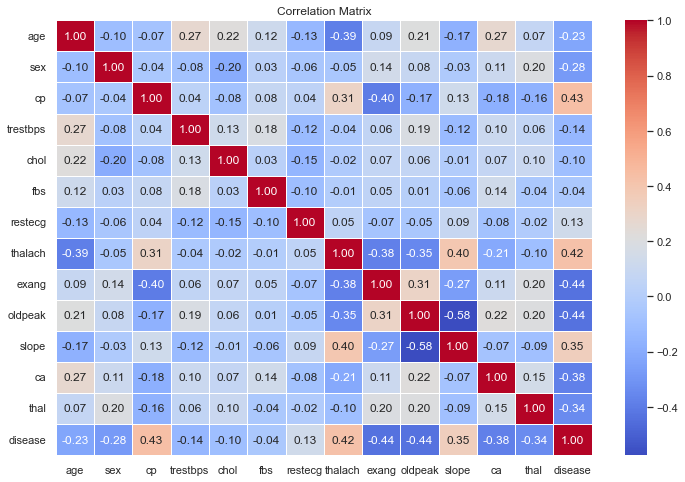

In [41]:
# Calculate the correlation matrix
correlation_matrix = heart.corr()

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")

plt.show()

In [24]:
# Extract correlations with "target" feature
correlations_with_target = correlation_matrix['disease']

# Sort the correlations in descending order
sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

disease     1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: disease, dtype: float64


These features have the highest absolute correlation coefficients with the "target(disease)" feature, indicating a stronger relationship with heart disease presence. "oldpeak," "exang," and "cp" have the highest correlations and are likely to be the most strongly related features in predicting heart disease.

In [65]:
# Create a count plot using Plotly Express
fig = px.histogram(heart, x="cp", color="disease", title="Distribution of Chest Pain Type and Heart Disease", labels={"cp": "Chest Pain Type", "disease": "Heart Disease Presence"})

# Customize the layout
fig.update_xaxes(categoryorder="total ascending", title_text="Chest Pain Type")
fig.update_yaxes(title_text="Count")

fig.show()

In [47]:
import plotly.graph_objects as go
import scipy.stats as stats

# Group data by chest pain type and calculate the count of heart disease cases and non-cases
cp_heart_disease = heart.groupby(['cp', 'disease'])['disease'].count().unstack()

# Create a grouped bar chart using Plotly Express
fig = px.bar(cp_heart_disease, x=cp_heart_disease.index, y=[0, 1], title='Heart Disease Presence by Chest Pain Type', labels={'cp': 'Chest Pain Type'})
fig.update_layout(barmode='group', xaxis_title='Chest Pain Type', yaxis_title='Count')
fig.update_xaxes(tickvals=[0, 1, 2, 3], ticktext=['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'])

# Perform a chi-squared test for chest pain type and heart disease presence
chi2, p, _, _ = stats.chi2_contingency(cp_heart_disease)
chi2 = round(chi2, 2)
p = round(p, 5)
test_result = f"Chi-squared test statistic: {chi2}<br>P-value: {p}"

# Add a text annotation with the chi-squared test results
fig.add_annotation(
    go.layout.Annotation(
        text=test_result,
        x=0.5, y=1.08,
        showarrow=False,
        xref='paper', yref='paper'
    )
)

fig.show()


This implies that chest pain type is a significant factor in predicting heart disease, and there is substantial evidence supporting the claim that chest pain type is associated with heart disease presence in the dataset.

The type of chest pain (cp) experienced by individuals is associated with heart disease presence.
Certain chest pain types, such as "Atypical Angina" and "Non-Anginal," are more strongly associated with heart disease than others.

In [48]:
# Create a count plot using Plotly Express
fig = px.bar(heart, x="exang", color="disease", title="Exercise-Induced Angina vs. Heart Disease", labels={"exang": "Exercise-Induced Angina", "disease": "Heart Disease Presence"})

# Customize the legend labels
fig.for_each_trace(lambda trace: trace.update(name="No Disease" if trace.name == 0 else "Disease"))

# Set x-axis labels
fig.update_xaxes(tickvals=[0, 1], ticktext=["No", "Yes"])

# Set y-axis label
fig.update_yaxes(title_text="Count")

fig.show()


For individuals with heart disease, the count of exercise-induced angina (exang = 1) appears lower compared to those without exercise-induced angina (exang = 0).
For individuals without heart disease, the count of exercise-induced angina (exang = 1) is noticeably higher than those without exercise-induced angina (exang = 0).

In [70]:
# Create a subplot grid with one subplot
fig = sp.make_subplots(rows=1, cols=1, subplot_titles=("Maximum Heart Rate Distribution for Heart Disease Cases and Non-Cases"))

# Create histograms of maximum heart rate for heart disease cases and non-cases
histogram_disease = go.Histogram(x=heart[heart['disease'] == 1]['thalach'], name='Heart Disease', marker_color='red', opacity=0.7)
histogram_no_disease = go.Histogram(x=heart[heart['disease'] == 0]['thalach'], name='No Heart Disease', marker_color='blue', opacity=0.7)

fig.add_trace(histogram_disease, row=1, col=1)
fig.add_trace(histogram_no_disease, row=1, col=1)

fig.update_xaxes(title_text='Maximum Heart Rate (thalach)', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

fig.show()


We can see how the two distributions overlap or differ. In this case, it can be observed that the distribution of maximum heart rate for heart disease cases (red) appears to be shifted to the left compared to non-cases (blue). This suggests that, on average, individuals with heart disease tend to have a lower maximum heart rate.

In [68]:
# Create a box plot using Plotly Express
fig = px.box(heart, x="disease", y="age", color="sex", title="Age Distribution by Gender for Heart Disease Cases and Non-Cases", labels={"disease": "Heart Disease Presence"})

# Customize the legend labels
fig.for_each_trace(lambda trace: trace.update(name="Male" if trace.name == "0" else "Female"))

# Set x-axis labels
fig.update_xaxes(tickvals=[0, 1], ticktext=["No Disease", "Disease"])

# Set y-axis label
fig.update_yaxes(title_text="Age")

fig.show()


Age is an important factor in heart disease. As age increases, the likelihood of heart disease also increases.
There is a clear age difference between heart disease cases and non-cases. Heart disease is more prevalent in older individuals.